# Chapter 07. CNN CIFAR10 Example in Pytorch

In [0]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init
import torchvision.datasets as dset
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torch.autograd import Variable

## 1. 하이퍼파라미터 설정

In [0]:
batch_size = 256             # 배치 크기
learning_rate = 0.0002       # 학습률
num_epoch = 50               # epoch

## 2. 입력 데이터
### 2.1. 데이터 로드

In [16]:
cifar_train = dset.CIFAR10("./", train=True, transform=transforms.ToTensor(), target_transform=None, download=True)
cifar_test = dset.CIFAR10("./", train=False, transform=transforms.ToTensor(), target_transform=None, download=True)

Files already downloaded and verified
Files already downloaded and verified


### 2.2. 데이터 확인

In [17]:
print('(학습 데이터의 이미지 크기, 학습 데이터의 개수) :', cifar_train.__getitem__(0)[0].size(), cifar_train.__getitem__(0)[1], cifar_train.__len__())
print('(시험 데이터의 이미지 크기, 시험 데이터의 개수) :',cifar_test.__getitem__(0)[0].size(), cifar_test.__getitem__(0)[1], cifar_test.__len__())

(학습 데이터의 이미지 크기, 학습 데이터의 개수) : torch.Size([3, 32, 32]) 6 50000
(시험 데이터의 이미지 크기, 시험 데이터의 개수) : torch.Size([3, 32, 32]) 3 10000


In [0]:
# 클래스 라벨
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

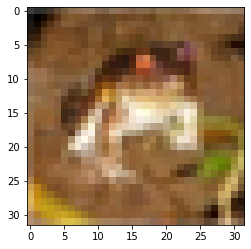

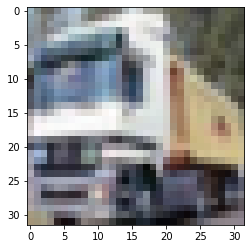

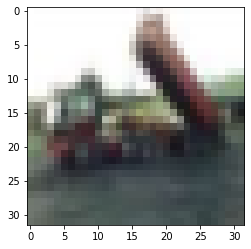

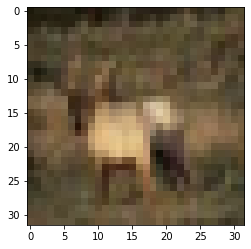

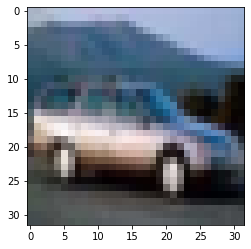

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

# 상위 5개의 데이터 출력
for i in range(5):
    img= cifar_train[i][0].numpy().transpose(1,2,0)
    plt.imshow(img)
    plt.show()

### 2.3. 데이터로더 설정

In [0]:
train_loader = torch.utils.data.DataLoader(cifar_train,batch_size=batch_size, shuffle=True,num_workers=2,drop_last=True)
test_loader = torch.utils.data.DataLoader(cifar_test,batch_size=batch_size, shuffle=False,num_workers=2,drop_last=True)

## 3. 신경망 모델 정의

In [0]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN,self).__init__()
        self.layer = nn.Sequential(
            nn.Conv2d(3,16,3,padding=1),
            nn.ReLU(),
            nn.Conv2d(16,32,3,padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2,2), # 32 x 16 x 16
            
            nn.Conv2d(32,64,3,padding=1),
            nn.ReLU(),
            nn.Conv2d(64,128,3,padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2,2), # 128 x 8 x 8
            
            nn.Conv2d(128,256,3,padding=1),
            nn.ReLU(),
            nn.Conv2d(256,256,3,padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2,2)  # 256 x 4 x 4
        )
        
        # 마지막 Layer
        self.fc_layer = nn.Sequential(
            nn.Linear(256*4*4,200),
            nn.ReLU(),
            nn.Linear(200,10)
        )       
        
    def forward(self,x):
        out = self.layer(x)
        out = out.view(batch_size,-1)
        out = self.fc_layer(out)

        return out

In [0]:
model = CNN().cuda()

### 4. 손실 함수와 경사하강법(Optimizer) 객체 생성

In [0]:
loss_func = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

## 5. 학습

In [24]:
print('='*30, 'Start', '='*30)

for i in range(num_epoch):
    for j,[image,label] in enumerate(train_loader):
        x = Variable(image).cuda()
        y_= Variable(label).cuda()
        
        optimizer.zero_grad()
        output = model.forward(x)
        loss = loss_func(output,y_)
        loss.backward()
        optimizer.step()
        
        if j % 100 == 0:
            print('[epoch] :', i, '| [iter] :', j, '| [loss] :', loss.data)
        
print('='*30, 'End', '='*30)

============================== Start ==============================
[epoch] : 0 | [iter] : 0 | [loss] : tensor(2.3066, device='cuda:0')
[epoch] : 0 | [iter] : 100 | [loss] : tensor(2.0111, device='cuda:0')
[epoch] : 1 | [iter] : 0 | [loss] : tensor(1.7143, device='cuda:0')
[epoch] : 1 | [iter] : 100 | [loss] : tensor(1.6408, device='cuda:0')
[epoch] : 2 | [iter] : 0 | [loss] : tensor(1.6051, device='cuda:0')
[epoch] : 2 | [iter] : 100 | [loss] : tensor(1.4205, device='cuda:0')
[epoch] : 3 | [iter] : 0 | [loss] : tensor(1.3846, device='cuda:0')
[epoch] : 3 | [iter] : 100 | [loss] : tensor(1.3724, device='cuda:0')
[epoch] : 4 | [iter] : 0 | [loss] : tensor(1.3664, device='cuda:0')
[epoch] : 4 | [iter] : 100 | [loss] : tensor(1.2613, device='cuda:0')
[epoch] : 5 | [iter] : 0 | [loss] : tensor(1.1655, device='cuda:0')
[epoch] : 5 | [iter] : 100 | [loss] : tensor(1.2412, device='cuda:0')
[epoch] : 6 | [iter] : 0 | [loss] : tensor(1.2572, device='cuda:0')
[epoch] : 6 | [iter] : 100 | [loss] 

In [25]:
param_list = list(model.children())
print(param_list)

[Sequential(
  (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU()
  (2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU()
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU()
  (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU()
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU()
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU()
  (14): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
), Sequential(
  (0): Linear(in_features=4096, out_features=200, bias=True)
  (1): ReLU()
  (2): Linear(in_features=200, out_features=10, bias=True)
)]


## 6. 모델 성능 평가

In [26]:
correct = 0
total = 0

for image,label in test_loader:
    x = Variable(image).cuda()
    y_= Variable(label).cuda()

    output = model.forward(x)
    _,output_index = torch.max(output,1)
        
    total += label.size(0)
    correct += (output_index == y_).sum().float()
    
print("Accuracy of Test Data: {}".format(100*correct/total))

Accuracy of Test Data: 69.89183044433594
